<a href="https://colab.research.google.com/github/weltonlopesdev/A3---Algoritimo-KMeans/blob/main/Clustering_Kmeans_A3_Tipos_de_Pizza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TRABALHO A3 - INTELIGÊNCIA ARTIFICIAL - UTILIZANDO O ALGORITIMO K.MEANS

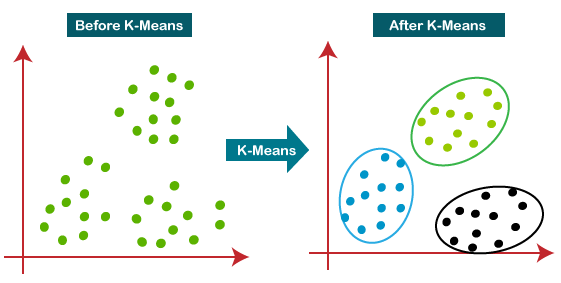

Levantamento da Bibliografia. Definição dos dados, variáveis e metodologia



**bibliografia:**

https://repositorio-api.fei.edu.br/server/api/core/bitstreams/7be090ad-8ad7-403f-b1fb-f03a9652bb5e/content

https://edisciplinas.usp.br/pluginfile.php/4461141/mod_resource/content/1/Aula21_Agrupamento_kmeans.pdf

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

https://realpython.com/k-means-clustering-python/


**Definição dos dados:**

Tipos de Pizza:

**variáveis:** nomes, categoria, ingredientes, price, tamanho

**metodologia:** elbow(seleção de clusters)(welton), normalização de dados( ryan), exploração analitica(alexandre elucas), avaliação de resultados obtidos.(andre)

In [13]:
import pandas as pd
import numpy as np
from datetime import datetime
#from sklearn.preprocesing import MinMaxScaler
from sklearn import preprocessing
from sklearn.cluster import KMeans
from IPython.display import Image
import seaborn as sns
import matplotlib.pyplot as plt
#from matplot.gridspec import Gridspec
from functools import reduce
import pickle
import warnings
warnings.filterwarnings("ignore")

In [35]:
data = pd.read_excel('DataModelPizzaSales.xlsx')

In [36]:
data.head()

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [37]:
data.describe()

,order_details_id,order_id,quantity,unit_price,total_price
count,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,16.494132,16.821474
std,14035.529381,6180.119770,0.143077,3.621789,4.437398
min,1.000000,1.000000,1.000000,9.750000,9.750000
25%,12155.750000,5337.000000,1.000000,12.750000,12.750000
50%,24310.500000,10682.500000,1.000000,16.500000,16.500000
75%,36465.250000,16100.000000,1.000000,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,35.950000,83.000000


In [38]:
data.columns

Index(['order_details_id', 'order_id', 'pizza_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')